# Visualization with Matplotlib

John Hunter 在2002年开始酝酿 Matplotlib，他希望将其作为 IPython的补丁，方便做出 MATLAB 风格的图像。

近些年，Matplotlib 显示出其老态，尤其是人们看到 R 语言中的 ggplot 和 ggvis，与 D3js、HTML5 canvas这样的 web 可视化工具之后。但 Matplotlib 仍然是不可或缺的工具，而且人们也基于它开发出了新的库，如`Seaborn`、`ggplot`、`HoloViews`、`Altair`等等。

## Matplotlib的基本技巧

### 导入

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# set styles
plt.style.use('classic')

### 如何显示

大致上，Matplotlib 有三种可用的上下文：脚本；IPython 终端；IPython notebook。在 notebook 中，可使用：

In [2]:
%matplotlib inline

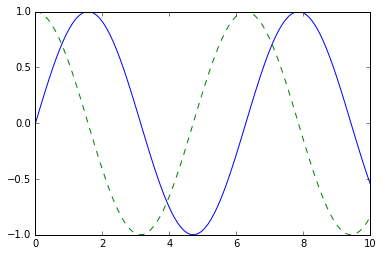

In [4]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [5]:
# save to file
fig.savefig('sin_cos.png')

In [7]:
# supported file types
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

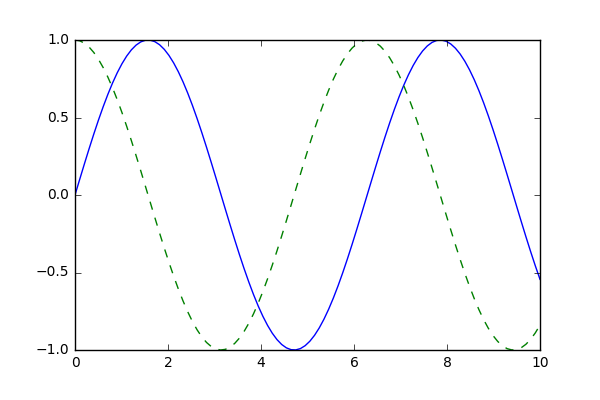

In [6]:
# display local image
from IPython.display import Image

Image('sin_cos.png')

## 两种界面

Matplotlib 支持两种界面：MATLAB 风格、OO 风格。

### MATLAB 风格

Matplotlib 最初为 MATLAB 用户所写，从其语法可见端倪。

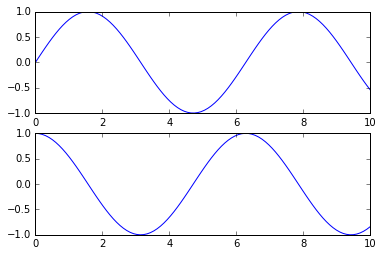

In [9]:
# create a figure
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

### OO 风格

简单的情况下，两者皆可，更复杂的情况下，OO 风格更为方便。

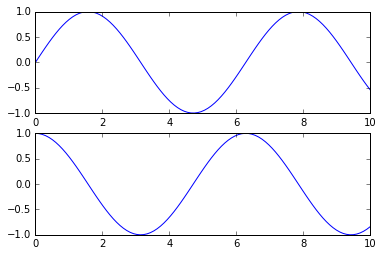

In [10]:
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## Simple Line Plots

以下实例皆使用以下设置：

In [11]:
%matplotlib inline

plt.style.use('seaborn-whitegrid')

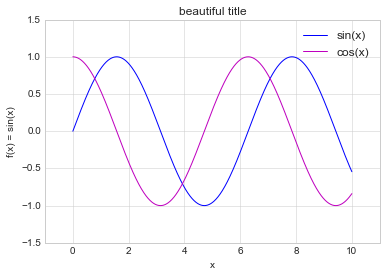

In [37]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
# color: blue; rgbcmyk; grayscale; #ffddee; (1.0, 0.2, 0.3); chartreuse (html color names);
# linestyle: solid/dashed/dashdot/dotted; -/--/-./:
# combined: -g

# ax.set_title('beautiful title')
# ax.set_xlabel('x')
# ax.set_ylabel('f(x) = sin(x)')

# ax.set_xlim(-1, 11)
# ax.set_ylim(-1.5, 1.5)

ax.set(title='beautiful title',
       xlabel='x',
       ylabel='f(x) = sin(x)',
       xlim=(-1, 11),
       ylim=(-1.5, 1.5))

ax.plot(x, np.sin(x), color='blue', label='sin(x)')
ax.plot(x, np.cos(x), color='m', label='cos(x)')

ax.legend();

在Matplotlib 中，`figure`可视为一个容器，其中包含表示坐标、图像、文本和标签的所有对象。`axes`（轴线）是一个有界框，具有刻度和标签，最终也会包含我们所做的图像。

ax 方法：
* set_xlim （可以用相反顺序）
* set_ylim
* set_title
* set_xlabel

## Simple Scatter Plots

可使用plt.plot或，plt.scatter，对于较大规模的数据，建议使用前者。

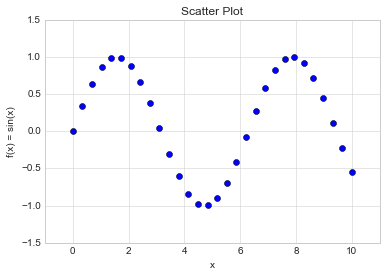

In [44]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 30)

ax.set(title='Scatter Plot',
       xlabel='x',
       ylabel='f(x) = sin(x)',
       xlim=(-1, 11),
       ylim=(-1.5, 1.5))

# 3rd parameter specify symbol
ax.plot(x, np.sin(x), 'o');

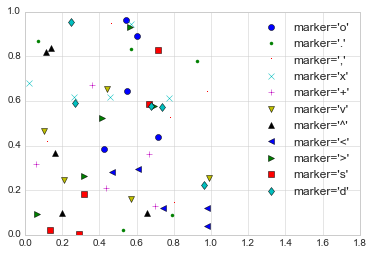

In [46]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
    label="marker='{0}'".format(marker))
    
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

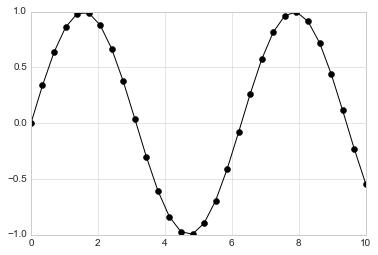

In [50]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 30)
# line (-), circle (o), black (k)
ax.plot(x, np.sin(x), '-ok');

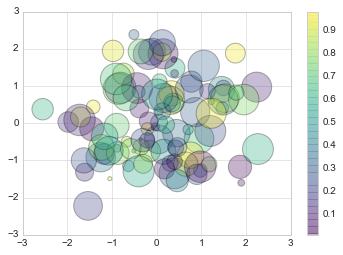

In [53]:
# color bar
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
cmap='viridis')
plt.colorbar(); # show color scale

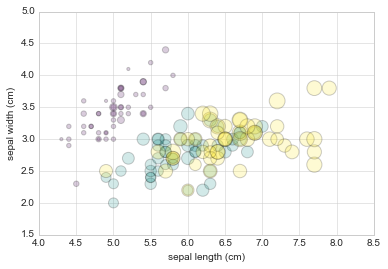

In [54]:
# 多维的可视化
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.2,
s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## Visualizing Errors

<ErrorbarContainer object of 3 artists>

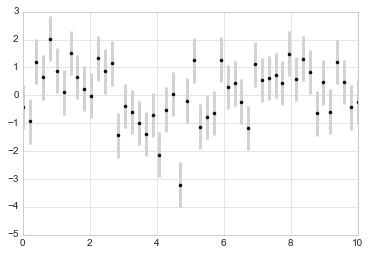

In [62]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(len(x))

plt.errorbar(x, y, yerr=dy, fmt='.k',
             color='black', ecolor='lightgray', elinewidth=3, capsize=0)

## Density and Contour Plots

使用二维图形显示三维数据

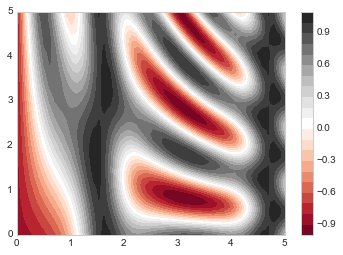

In [66]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + x * y) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# plt.contour(X, Y, Z, cmap='RdGy')
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

## Histograms, Binnings and Density

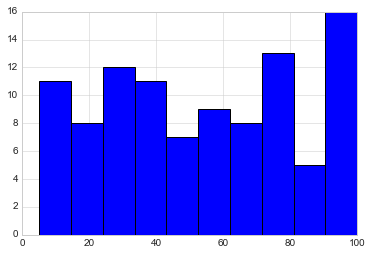

In [71]:
import random

ns = [random.randint(1, 100) for i in range(100)]
plt.hist(ns);

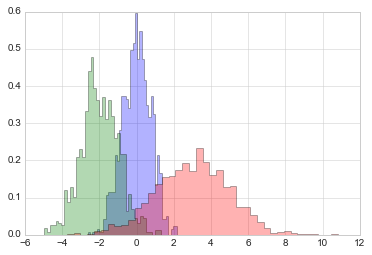

In [75]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Seaborn Versus Matplotlib



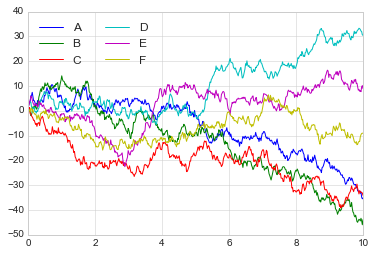

In [76]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [77]:
import seaborn as sns
sns.set()

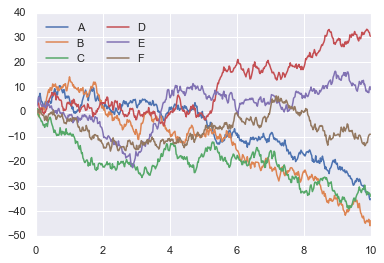

In [78]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');